In [1]:
from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

## 0.1 Generate demand forecast scenario

In [2]:
# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

# create a future througput scenario
maize.scenario_random(startyear = 2019, lifecycle = 50)
wheat.scenario_random(startyear = 2019, lifecycle = 50)
soybeans.scenario_random(startyear = 2019, lifecycle = 50)

demand = [maize, wheat, soybeans]

# plot scenarios 
if False:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

## 0.2 Generate vessels

In [3]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax]

# 1. Instatiate terminal system

In [4]:
Terminal = system.System(startyear = 2019, lifecycle = 50, elements = demand + vessels, debug=False,
                         crane_type_defaults=defaults.mobile_crane_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [5]:
Terminal.simulate()

## Report all elements

In [6]:
if Terminal.debug:
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

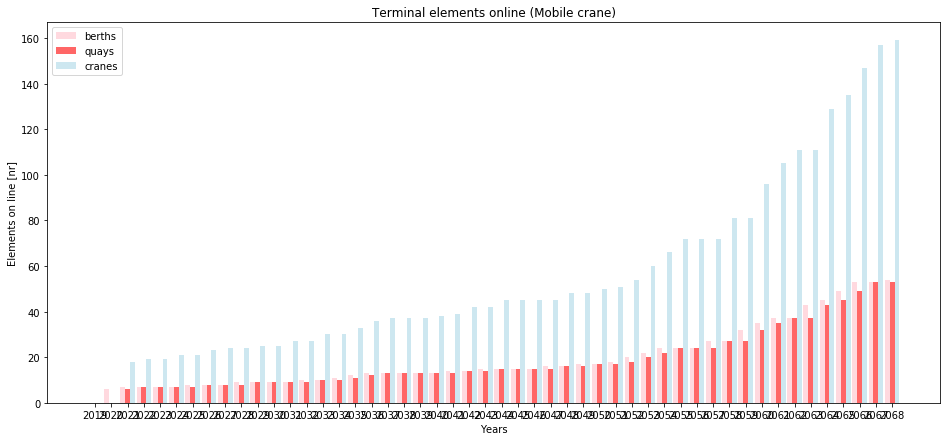

In [7]:
Terminal.terminal_elements_plot()

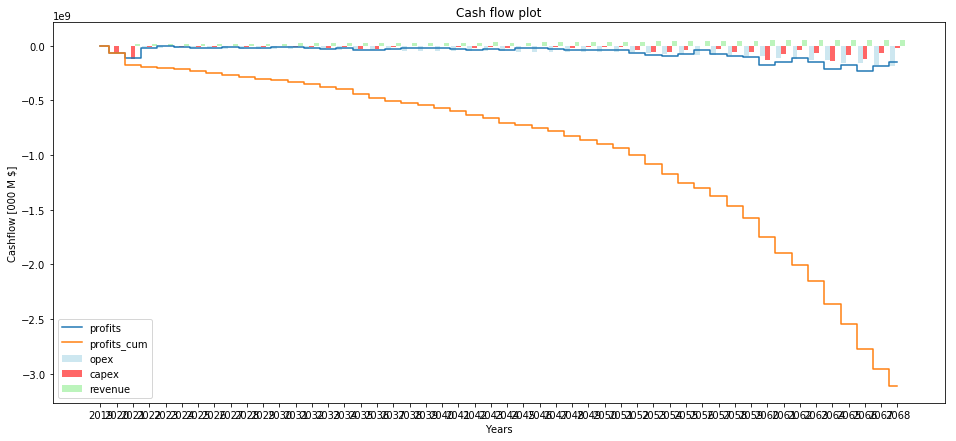

In [8]:
Terminal.cashflow_plot()

## SandBox

In [9]:
Terminal.NPV()

PV: [ 0.00000000e+00 -6.74409600e+07 -1.09255176e+08 -1.69090265e+07
 -6.04348165e+06 -1.32704116e+07 -1.76204121e+07 -2.08872681e+07
 -1.17947171e+07 -2.12020918e+07 -2.01721218e+07 -9.42531395e+06
 -1.57561740e+07 -2.05124945e+07 -2.78429055e+07 -2.16144311e+07
 -3.90463011e+07 -4.30964068e+07 -2.77858874e+07 -1.81445466e+07
 -1.73828166e+07 -1.98413056e+07 -3.14526793e+07 -3.57139241e+07
 -3.05576407e+07 -3.95394347e+07 -2.38383224e+07 -2.29141184e+07
 -3.31325984e+07 -4.05188123e+07 -3.60150740e+07 -3.83171840e+07
 -3.92048919e+07 -6.39572767e+07 -8.50082963e+07 -9.15883836e+07
 -7.62934489e+07 -4.32992742e+07 -7.66501662e+07 -9.65906952e+07
 -1.04512164e+08 -1.75720628e+08 -1.44195090e+08 -1.11183727e+08
 -1.46360866e+08 -2.13423769e+08 -1.80115831e+08 -2.26282840e+08
 -1.86465970e+08 -1.48848671e+08]
NPV: -3106746026.3999996


## Add a supply chain graph
The graph should be useable to detect if all elements of the supplychain are in place. 
Only when a path through the supply chain is available can revenue be obtained. 
This is still an experimental functionality and not yet fully implemented. 

In [10]:
# *** specify supply chain logic
# 1. create object types
quay = objects.Quay_wall(**defaults.quay_wall_data)
berth = objects.Berth(**defaults.berth_data)
crane = objects.Cyclic_Unloader(**defaults.gantry_crane_data)
screw = objects.Continuous_Unloader(**defaults.continuous_screw_data)
conveyor1 = objects.Conveyor(**defaults.quay_conveyor_data)
storage = objects.Storage(**defaults.silo_data)
conveyor2 = objects.Conveyor(**defaults.hinterland_conveyor_data)
unloading_station = objects.Unloading_station(**defaults.hinterland_station_data)

# 2. specify nodes and edges
nodes = [quay, berth, crane, screw, conveyor1, storage, conveyor2, unloading_station]
edges = [[quay, berth],
         [berth, crane],
         [crane, screw],
         [screw, conveyor1],
         [conveyor1, storage],
         [storage, conveyor2],
         [conveyor2, unloading_station]]

# 3. invoke the supply_chain method
Terminal.supply_chain(nodes, edges)

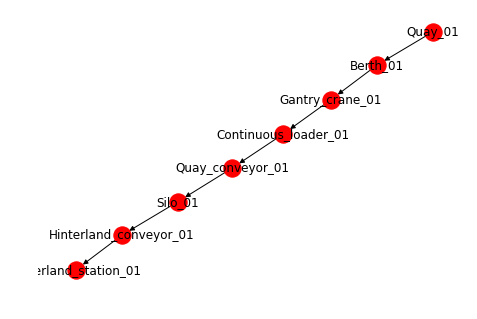

In [11]:
Terminal.plot_system()